In [1]:
import matplotlib.pyplot as plt
import os.path
import numpy as np
%matplotlib inline

# Load Bootstrap Data 

In [2]:
#np.max(df_50_nonsig['Accuracy.50'])

In [3]:
import seaborn as sns


pcube = sns.color_palette("cubehelix",20)
#sns.palplot(pcube)

pbg = sns.color_palette("BuGn_r")
#sns.palplot(pbg)

ppaired =sns.color_palette("Paired")
#sns.palplot(ppaired)

phusl = sns.hls_palette(20,l=.4,s=.8)
#sns.palplot(phusl)

pdefault =sns.color_palette()
#sns.palplot(pdefault)

frontalsig = pdefault[0]
frontalnon = pdefault[2]

frontalsig = phusl[12]
#frontalnon = phusl[7]

#frontalsig = ppaired[1]
#frontalnon = ppaired[3]

#sns.palplot(frontalsig)
#sns.palplot(frontalnon)

#sns.palplot(frontalsig)
#sns.palplot(frontalnon)

In [4]:
# Set the font dictionaries (for plot title and axis titles)
#title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
#              'verticalalignment':'bottom'} # Bottom vertical alignment for more space#

#axis_font = {'fontname':'Arial', 'size':'20'}

# ax1.set_xlabel('Study ID',**axis_font)
# ax1.set_ylabel('Decoding Accuracy',**axis_font)
# ax2.set_xlabel('Decoding Accuracy',**axis_font)
# ax2.set_ylabel('Cumulative Probability',**axis_font)
# ax3.set_xlabel('Decoding Accuracy',**axis_font)
# ax3.set_ylabel('Probability Density',**axis_font)
# ax1.set_title('(a)',**axis_font)
# ax2.set_title('(b)',**axis_font)
# ax3.set_title('(c)',**axis_font)

# NonConservative

In [5]:
boot_results_sig = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_sig_v8b.npz')
boot_results_non = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_nonsig_v8b.npz')
boot_results_both_notrecentered = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_together_v8b.npz')

 
sig_thresh1=boot_results_both_notrecentered['sig_thresh1'].mean() # 95% of non re-centered

#sig_thresh2=boot_results_both['sig_thresh2'].mean() # max of means nonsig
mediann_sig = boot_results_sig['mediann'].mean()
mediann_non = boot_results_non['mediann'].mean()

#mediann_non_con = boot_results_n['mediann'].mean()

epcdf_store_non = boot_results_non['epcdf_store']
epcdf_store_sig = boot_results_sig['epcdf_store']
eppdf_store_non = boot_results_non['eppdf_store']
eppdf_store_sig = boot_results_sig['eppdf_store']


x = np.linspace(0,1,100) # what range for cdf # 


In [6]:
from PIL import Image
from io import BytesIO


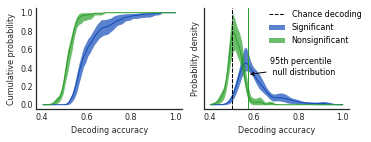

In [7]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")
alphaa = 0.7

sns.set_style('white')
params = {
   'axes.labelsize': 10,
   'axes.titlesize': 10,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
}

params = {
   'axes.labelsize': 8,
   'axes.titlesize': 8,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 8,
   'legend.fontsize': 8,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
    'text.color':'black'
}

plt.rcParams.update(params)
plt.rcParams.update(params)
plt.rcParams['font.sans-serif']='Helvetica'
plt.rcParams['font.family']='sans-serif'

fig = plt.figure(figsize=(5,2))
alphadots=1
sizedots=8
mainlinewidth = 1
whiteoutline = 0.1
chanceline = 1

gs = gridspec.GridSpec(1, 2) # number of columns to be able to use
ax1 = plt.subplot(gs[:,0:1])
ax2 = plt.subplot(gs[:,1:2])



#### CDF 
# significant 
upci = np.percentile(epcdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_sig[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,alpha=alphaa,linestyle='None',linewidth=0)


# non significant 
upci = np.percentile(epcdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_non[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,alpha=alphaa,linestyle='None',linewidth=0)



##### PDF 

# significant 
upci = np.percentile(eppdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_sig[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,label='Significant',alpha=alphaa,linestyle='None',linewidth=0)


# non significant 
upci = np.percentile(eppdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_non[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,label='Nonsignificant',alpha=alphaa,linestyle='None',linewidth=0)

# mscl lines 
ax2.axvline(x=np.mean(sig_thresh1),color=frontalnon,linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',label='Chance decoding',linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',linewidth=chanceline)




ax1.set_xlabel('Decoding accuracy',fontname='Helvetica')
ax1.set_ylabel('Cumulative probability')
ax2.set_xlabel('Decoding accuracy')
ax2.set_ylabel('Probability density')

# ax1.set_title('a')
# ax2.set_title('b')


ax2.set_yticks([])
ax2.set_yticklabels([])

for ax in [ax1,ax2]:
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.set_axis_bgcolor('white')

plt.legend(bbox_to_anchor=(.40, 1.05), loc=2)

ax2.annotate('95th percentile \n null distribution', 
             xy=(sig_thresh1,5.5), 
             xytext=(sig_thresh1+0.1,5.5),
             arrowprops=dict(arrowstyle='->',facecolor='black',linewidth=1),
            )
 
plt.tight_layout(h_pad=2.0,w_pad=1.0)
#plt.savefig('../Figures/Figure2_v8b.png',dpi=400)
#plt.savefig('../Figures/Figure2_v8b.eps',dpi=400)

# Save the image in memory in PNG format
png1 = BytesIO()
fig.savefig(png1, format='png',dpi=1000,bbox_inches="tight")

# Load this image into PIL
png2 = Image.open(png1)

# (3) save as TIFF
png2.save('../Figures_JOCN_Final/Figure4_noncons_dis_nonconserv_threshold_v8b.tiff')
png1.close()

plt.show()

# Conservative 

In [8]:
boot_results_both_recentered = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_together_recenter.npz')


sig_thresh1=boot_results_both_recentered['sig_thresh1'].mean() # 95% of non re-centered


mediann_sig = boot_results_both_recentered['mediann']
mediann_non = boot_results_both_recentered['mediann_non']
epcdf_store_sig = boot_results_both_recentered['epcdf_store_si']
epcdf_store_non = boot_results_both_recentered['epcdf_store_non']
eppdf_store_sig = boot_results_both_recentered['eppdf_store_sig']
eppdf_store_non = boot_results_both_recentered['eppdf_store_non']



x = np.linspace(0,1,100) # what range for cdf # 


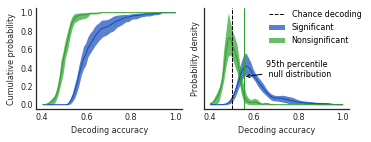

In [9]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")
alphaa = 0.7

sns.set_style('white')
params = {
   'axes.labelsize': 8,
   'axes.titlesize': 8,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'font.size': 8,
   'legend.fontsize': 8,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
    'text.color':'black'
}
plt.rcParams['font.sans-serif']='DejaVu Sans'#'Helvetica'
plt.rcParams.update(params)

#plt.rcParams['font']='Helvetica'

fig = plt.figure(figsize=(5,2))
alphadots=1
sizedots=8
mainlinewidth = 1
whiteoutline = 0.1
chanceline = 1

gs = gridspec.GridSpec(1, 2) # number of columns to be able to use
ax1 = plt.subplot(gs[:,0:1])
ax2 = plt.subplot(gs[:,1:2])



#### CDF 
# significant 
upci = np.percentile(epcdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_sig[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,alpha=alphaa,linestyle='None',linewidth=0)


# non significant 
upci = np.percentile(epcdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_non[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,alpha=alphaa,linestyle='None',linewidth=0)



##### PDF 

# significant 
upci = np.percentile(eppdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_sig[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,label='Significant',alpha=alphaa,linestyle='None',linewidth=0)


# non significant 
upci = np.percentile(eppdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_non[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,label='Nonsignificant',alpha=alphaa,linestyle='None',linewidth=0)

# mscl lines 
ax2.axvline(x=np.mean(sig_thresh1),color=frontalnon,linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',label='Chance decoding',linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',linewidth=chanceline)




ax1.set_xlabel('Decoding accuracy',fontname='Helvetica')
ax1.set_ylabel('Cumulative probability')
ax2.set_xlabel('Decoding accuracy')
ax2.set_ylabel('Probability density')

# ax1.set_title('a')
# ax2.set_title('b')


ax2.set_yticks([])
ax2.set_yticklabels([])

for ax in [ax1,ax2]:
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.set_axis_bgcolor('white')


plt.legend(bbox_to_anchor=(.40, 1.05), loc=2)

ax2.annotate('95th percentile \n null distribution', 
             xy=(sig_thresh1,5.5), 
             xytext=(sig_thresh1+0.1,5.5),
             arrowprops=dict(arrowstyle='->',facecolor='black',linewidth=1),
            )
 
plt.tight_layout(h_pad=2.0,w_pad=1.0)
#plt.savefig('../Figures/Figure2_cons_v8b.png',dpi=400)
#plt.savefig('../Figures/Figure2.eps',dpi=400)

# Save the image in memory in PNG format
png1 = BytesIO()
fig.savefig(png1, format='png',dpi=1000,bbox_inches="tight")

# Load this image into PIL
png2 = Image.open(png1)

# (3) save as TIFF
png2.save('../Figures_JOCN_Final/Figure4_cons_dis_conserv_threshold_v8b.tiff')
png1.close()

plt.show()


# NonConservative Distribution, Conservative 95%

In [10]:
boot_results_sig = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_sig_v8b.npz')
boot_results_non = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_nonsig_v8b.npz')
boot_results_both_notrecentered = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_together_v8b.npz')
boot_results_both_recentered = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_together_recenter.npz')

sig_thresh1=boot_results_both_recentered['sig_thresh1'].mean() # 95% of non re-centered 
#sig_thresh1=boot_results_both_notrecentered['sig_thresh1'].mean() # 95% of non re-centered

#sig_thresh2=boot_results_both['sig_thresh2'].mean() # max of means nonsig
mediann_sig = boot_results_sig['mediann'].mean()
mediann_non = boot_results_non['mediann'].mean()

#mediann_non_con = boot_results_n['mediann'].mean()

epcdf_store_non = boot_results_non['epcdf_store']
epcdf_store_sig = boot_results_sig['epcdf_store']
eppdf_store_non = boot_results_non['eppdf_store']
eppdf_store_sig = boot_results_sig['eppdf_store']


x = np.linspace(0,1,100) # what range for cdf # 

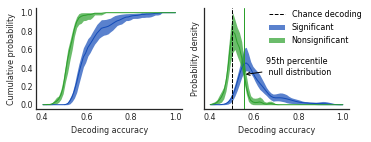

In [11]:
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")
alphaa = 0.7

sns.set_style('white')

params = {
   'axes.labelsize': 8,
   'axes.titlesize': 8,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 8,
   'legend.fontsize': 8,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
    'text.color':'black'
}

plt.rcParams.update(params)
plt.rcParams.update(params)
plt.rcParams['font.sans-serif']='Helvetica'
plt.rcParams['font.family']='sans-serif'

fig = plt.figure(figsize=(5,2))
alphadots=1
sizedots=8
mainlinewidth = 1
whiteoutline = 0.1
chanceline = 1

gs = gridspec.GridSpec(1, 2) # number of columns to be able to use
ax1 = plt.subplot(gs[:,0:1])
ax2 = plt.subplot(gs[:,1:2])



#### CDF 
# significant 
upci = np.percentile(epcdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_sig[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,alpha=alphaa,linestyle='None',linewidth=0)


# non significant 
upci = np.percentile(epcdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_non[40:100],2.5,axis=0)
ax1.plot(x[40:100],np.mean(epcdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax1.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,alpha=alphaa,linestyle='None',linewidth=0)



##### PDF 

# significant 
upci = np.percentile(eppdf_store_sig[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_sig[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_sig,axis=0)[40:100],linewidth=mainlinewidth,color=frontalsig)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalsig,label='Significant',alpha=alphaa,linestyle='None',linewidth=0)


# non significant 
upci = np.percentile(eppdf_store_non[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_non[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(eppdf_store_non,axis=0)[40:100],linewidth=mainlinewidth,color=frontalnon)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalnon,label='Nonsignificant',alpha=alphaa,linestyle='None',linewidth=0)

# mscl lines 
ax2.axvline(x=np.mean(sig_thresh1),color=frontalnon,linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',label='Chance decoding',linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',linewidth=chanceline)




ax1.set_xlabel('Decoding accuracy',fontname='Helvetica')
ax1.set_ylabel('Cumulative probability')
ax2.set_xlabel('Decoding accuracy')
ax2.set_ylabel('Probability density')

# ax1.set_title('a')
# ax2.set_title('b')


ax2.set_yticks([])
ax2.set_yticklabels([])

for ax in [ax1,ax2]:
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.set_axis_bgcolor('white')


plt.legend(bbox_to_anchor=(.40, 1.05), loc=2)

ax2.annotate('95th percentile \n null distribution', 
             xy=(sig_thresh1,5.5), 
             xytext=(sig_thresh1+0.1,5.5),
             arrowprops=dict(arrowstyle='->',facecolor='black',linewidth=1),
            )
 
plt.tight_layout(h_pad=2.0,w_pad=1.0)
#plt.savefig('../Figures/Figure2_v8b.png',dpi=400)
#plt.savefig('../Figures/Figure2_v8b.eps',dpi=400)

# Save the image in memory in PNG format
png1 = BytesIO()
fig.savefig(png1, format='png',dpi=1000,bbox_inches="tight")

# Load this image into PIL
png2 = Image.open(png1)

# (3) save as TIFF
png2.save('../Figures_JOCN_Final/Figure4_noncons_dis_conserv_threshold_v8b.tiff')
png1.close()

plt.show()